Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS310.M11.1

Buổi 02 - 14/10/2021

# LAB 02 - PHÂN LỚP VĂN BẢN SỬ DỤNG PRE-TRAINED WORD EMBEDDING

Các bạn sử dụng bộ dữ liệu UIT-VSFC, tiến hành cài đặt, thử nghiệm và so sánh các thuật toán phân lớp văn bản gồm:
1. Thuật toán máy học cơ bản (Naive Bayes, Logistic regression, SVM).
2. Mạng neural, sử dụng word embedding.
3. Mạng neural, sử dụng pre-trained embedding.

Các bạn xử lý trên 2 tác vụ: sentiment-based và topic-based nhé.

## Chuẩn bị dữ liệu

In [1]:
import pandas as pd

path = '/content/drive/MyDrive/Dataset/UIT-VSFC'

### Train set

In [2]:
X_train = pd.read_csv(path + '/train/sents.txt',  sep='\n', header=None, index_col=None)
X_train = X_train.iloc[:, 0]
y_train = pd.read_csv(path + '/train/sentiments.txt',  sep='\n', header=None, index_col=None)
y_train_topic = pd.read_csv(path + '/train/topics.txt',  sep='\n', header=None, index_col=None)

### Dev set

In [3]:
X_dev = pd.read_csv(path + '/dev/sents.txt', sep='\n', header=None, index_col=None)
X_dev = X_dev.iloc[:, 0]
y_dev = pd.read_csv(path + '/dev/sentiments.txt', sep='\n', header=None, index_col=None)
y_dev_topic = pd.read_csv(path + '/dev/topics.txt',  sep='\n', header=None, index_col=None)

### Test set

In [4]:
X_test = pd.read_csv(path + '/test/sents.txt',  sep='\n', header=None, index_col=None)
X_test = X_test.iloc[:, 0]
y_test = pd.read_csv(path + '/test/sentiments.txt',  sep='\n', header=None, index_col=None)
y_test_topic = pd.read_csv(path + '/test/topics.txt',  sep='\n', header=None, index_col=None)

### Flatten labels

In [5]:
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

## Tác vụ **sentiment-based**

### Thuật toán máy học cơ bản

#### Naive Bayes

##### Import các thư viện cần thiết

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sn 

sn.set()

##### Tiền xử lý dữ liệu

In [7]:
cv = CountVectorizer(analyzer='word', ngram_range=(2,2))
cv.fit(X_train)

# Mã hóa văn bản tập train
X_train_encoded = cv.transform(X_train)
# Mã hóa văn bản tập dev
X_dev_encoded = cv.transform(X_dev)
# Mã hóa văn bản tập test
X_test_encoded = cv.transform(X_test)

##### Training model

In [8]:
model_NB = MultinomialNB()
model_NB.fit(X_train_encoded, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##### Predict

In [9]:
y_pred_dev = model_NB.predict(X_dev_encoded)
y_pred_test = model_NB.predict(X_test_encoded)

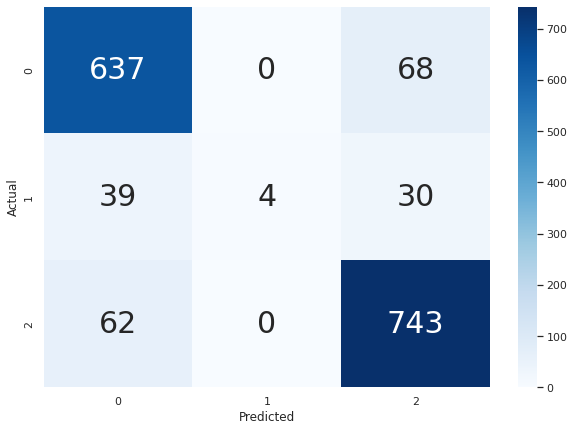

In [10]:
# Visualization confusion matrix of dev set
cm = confusion_matrix(y_dev, y_pred_dev) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

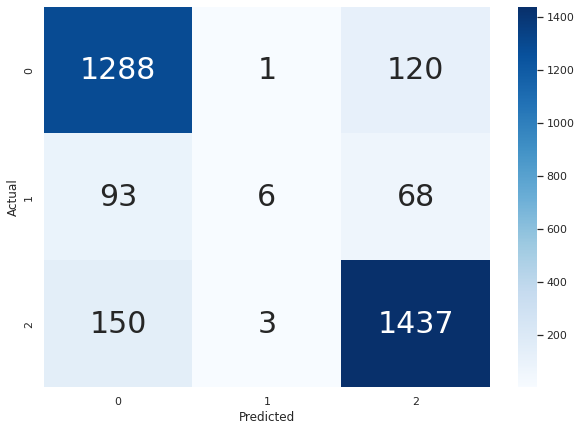

In [11]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred_test) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
print('F1-score macro dev set: {}%'.format(round(f1_score(y_dev, y_pred_dev, average='macro')*100, 2)))
print('F1-score macro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='macro')*100, 2)))

print('F1-score micro dev set: {}%'.format(round(f1_score(y_dev, y_pred_dev, average='micro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='micro')*100, 2)))

F1-score macro dev set: 62.99%
F1-score macro test set: 61.26%
F1-score micro dev set: 87.43%
F1-score micro test set: 86.26%


#### Logistic Regression

##### Import các thư viện cần thiết

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sn 

sn.set()

##### Tiền xử lý dữ liệu

In [14]:
cv = CountVectorizer(analyzer='word', ngram_range=(2,2))
cv.fit(X_train)

# Mã hóa văn bản tập train
X_train_encoded = cv.transform(X_train)
# Mã hóa văn bản tập dev
X_dev_encoded = cv.transform(X_dev)
# Mã hóa văn bản tập test
X_test_encoded = cv.transform(X_test)

##### Training model

In [15]:
model_LR = LogisticRegression()
model_LR.fit(X_train_encoded, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predict

In [16]:
y_pred_dev = model_LR.predict(X_dev_encoded)
y_pred_test = model_LR.predict(X_test_encoded)

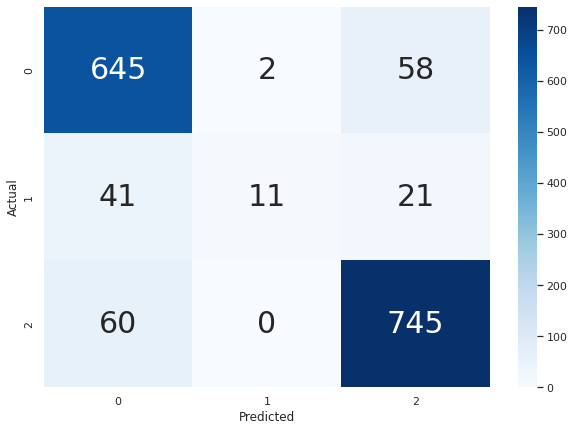

In [17]:
# Visualization confusion matrix of dev set
cm = confusion_matrix(y_dev, y_pred_dev) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

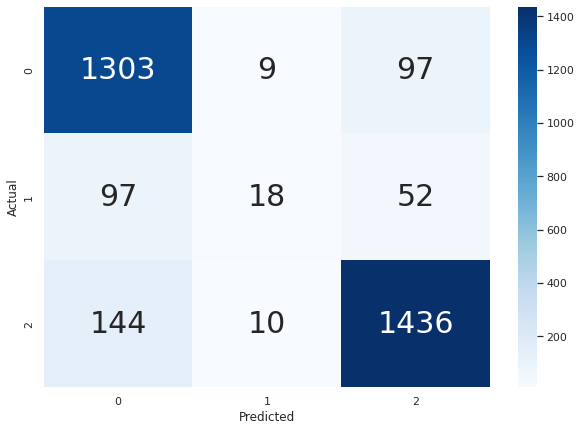

In [18]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred_test) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print('F1-score macro dev set: {}%'.format(round(f1_score(y_dev, y_pred_dev, average='macro')*100, 2)))
print('F1-score macro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='macro')*100, 2)))

print('F1-score micro dev set: {}%'.format(round(f1_score(y_dev, y_pred_dev, average='micro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='micro')*100, 2)))

F1-score macro dev set: 68.65%
F1-score macro test set: 65.45%
F1-score micro dev set: 88.5%
F1-score micro test set: 87.08%


#### Support Vector Machine

##### Import các thư viện cần thiết

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sn 

sn.set()

##### Tiền xử lý dữ liệu

In [21]:
cv = CountVectorizer(analyzer='word', ngram_range=(2,2))
cv.fit(X_train)

# Mã hóa văn bản tập train
X_train_encoded = cv.transform(X_train)
# Mã hóa văn bản tập dev
X_dev_encoded = cv.transform(X_dev)
# Mã hóa văn bản tập test
X_test_encoded = cv.transform(X_test)

##### Training model

In [22]:
model_SVM = SVC()
model_SVM.fit(X_train_encoded, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Predict

In [23]:
y_pred_dev = model_SVM.predict(X_dev_encoded)
y_pred_test = model_SVM.predict(X_test_encoded)

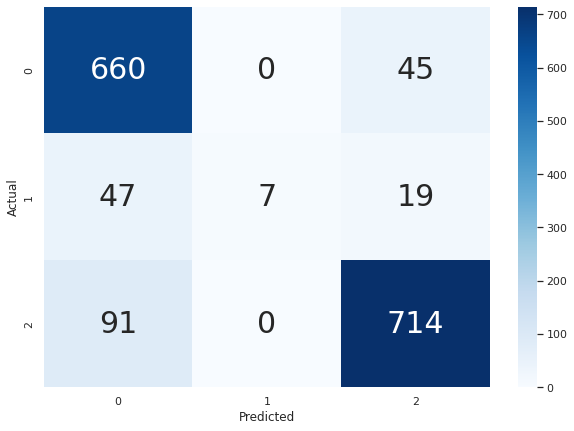

In [24]:
# Visualization confusion matrix of dev set
cm = confusion_matrix(y_dev, y_pred_dev) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

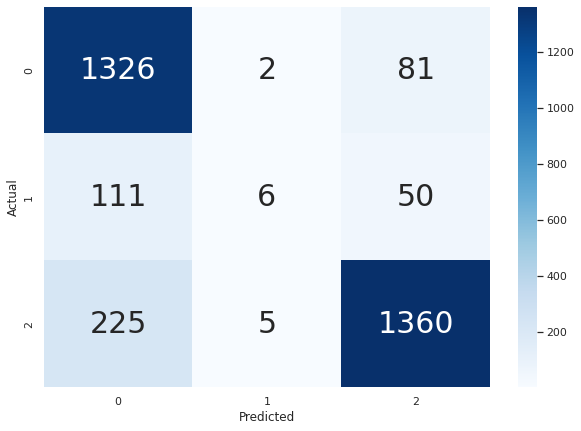

In [25]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred_test) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
print('F1-score macro dev set: {}%'.format(round(f1_score(y_dev, y_pred_dev, average='macro')*100, 2)))
print('F1-score macro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='macro')*100, 2)))

print('F1-score micro dev set: {}%'.format(round(f1_score(y_dev, y_pred_dev, average='micro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='micro')*100, 2)))

F1-score macro dev set: 65.18%
F1-score macro test set: 60.44%
F1-score micro dev set: 87.24%
F1-score micro test set: 85.03%


### Mạng neural, sử dụng **word embedding**

In [27]:
! pip install gensim
! pip install pyvi

#### Import các thư viện cần thiết

In [28]:
from pyvi import ViTokenizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer 
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, confusion_matrix

import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

sn.set()

#### Tiền xử lý dữ liệu

##### **Cách 1**: Tự xây dựng bộ từ vựng và từ điển tương ứng

###### Xây dựng tập từ vựng

In [29]:
# make vocabulary
V = [] 
for t in X_train: 
    tokenized_sentence = ViTokenizer.tokenize(t) 
    V = V + tokenized_sentence.split() 
 
V = list(set(V))

###### Xây dựng word_to_index và index_to_word

In [30]:
# Building dictionary  
word_to_index = {w : (i+2) for i, w in enumerate(V)} 
 
word_to_index['UNK'] = 1 
word_to_index['PAD'] = 0 
 
# Build index2w 
index_to_word = {i: w for w, i in word_to_index.items()}

###### Tiến hành encode dữ liệu văn bản

In [31]:
max_len = 100

def encoding(X): 
  sentences = [] 
  for t in X: 
    tokenized_sentence = ViTokenizer.tokenize(t) 
    sentences.append(tokenized_sentence) 
     
  X = [] 
  for s in sentences: 
    sent = [] 
    for w in s.split(): 
      try: 
        w = w.lower() 
        sent.append(dictionary[w]) 
      except: 
        sent.append(dictionary["UNK"]) 
    X.append(sent) 
     
  # Padding du lieu theo do dai cau (maxlen) 
  X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = dictionary["PAD"]) 
 
  return X 

##### **Cách 2**: Dùng thư viện có sẵn trong keras. Sử dụng thư viện **Tokenizer**

In [32]:
max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train)

word_2_index = word_tokenizer.word_index
word_2_index['pad'] = 0
word_2_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
  sentences = []
  for t in X:
    tokenized_sentence = ViTokenizer.tokenize(t)
    sentences.append(tokenized_sentence)
    
  X = word_tokenizer.texts_to_sequences(sentences)
  X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_2_index['pad'])

  return X

###### Tiến hành encode dữ liệu

In [33]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

#### Training model

In [34]:
num_words = len(word_2_index)
input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words+1, output_dim=300, input_length=max_len)(input)
flat = Flatten()(emb)
output = Dense(3, activation='sigmoid')(flat)

model_Neural_WE = Model(input, output)
# Compile model
model_Neural_WE.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [35]:
model_Neural_WE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          747600    
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 90003     
Total params: 837,603
Trainable params: 837,603
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Training model
history_Neural_WE = model_Neural_WE.fit(X_train_encoded, to_categorical(y_train, num_classes=3),
                                        validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), 
                                        batch_size=128, epochs=10)

Epoch 1/10
90/90 [==============================] - 4s 38ms/step - loss: 0.3672 - binary_accuracy: 0.8374 - val_loss: 0.2380 - val_binary_accuracy: 0.9172
Epoch 2/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1939 - binary_accuracy: 0.9342 - val_loss: 0.1913 - val_binary_accuracy: 0.9311
Epoch 3/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1580 - binary_accuracy: 0.9461 - val_loss: 0.1755 - val_binary_accuracy: 0.9364
Epoch 4/10
90/90 [==============================] - 3s 37ms/step - loss: 0.1352 - binary_accuracy: 0.9546 - val_loss: 0.1728 - val_binary_accuracy: 0.9389
Epoch 5/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1171 - binary_accuracy: 0.9615 - val_loss: 0.1746 - val_binary_accuracy: 0.9400
Epoch 6/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1021 - binary_accuracy: 0.9669 - val_loss: 0.1759 - val_binary_accuracy: 0.9394
Epoch 7/10
90/90 [==============================] - 3s 37ms/step - los

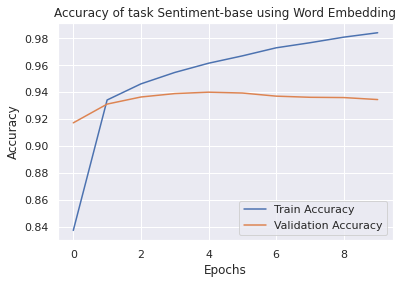

In [37]:
plt.figure(0)
plt.plot(history_Neural_WE.history['binary_accuracy'], label = 'Train Accuracy')
plt.plot(history_Neural_WE.history['val_binary_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy of task Sentiment-base using Word Embedding')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

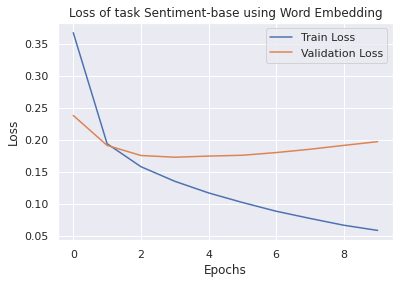

In [38]:
plt.figure(0)
plt.plot(history_Neural_WE.history['loss'], label = 'Train Loss')
plt.plot(history_Neural_WE.history['val_loss'], label = 'Validation Loss')
plt.title('Loss of task Sentiment-base using Word Embedding')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Predict

In [39]:
y_pred_test = model_Neural_WE.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

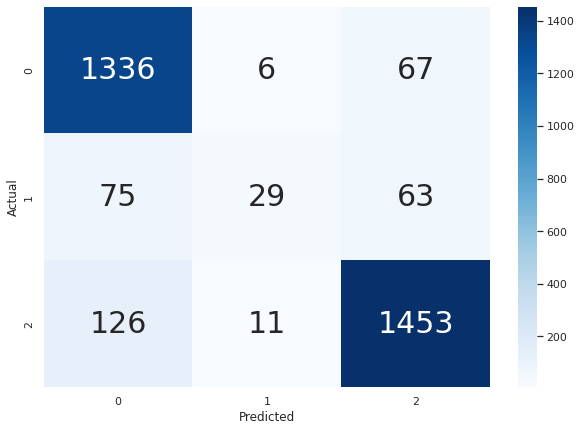

In [40]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred_test) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
print('F1-score macro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='macro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='micro')*100, 2)))

F1-score macro test set: 69.84%
F1-score micro test set: 89.01%


### Mạng neural, sử dụng **pre-trained embedding**

In [42]:
! pip install pyvi

#### Import các thư viện cần thiết

In [43]:
from pyvi import ViTokenizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer 
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, confusion_matrix

import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

sn.set()

#### Tiền xử lý dữ liệu

##### Đọc dữ liệu từ bộ word embedding

In [44]:
# Read embedding
word_dict = []
embeddings_index = {}
embedding_dim = 300
max_feature = len(embeddings_index) + 2

f = open(path + '/W2V_ner.vec')
for line in f:
  values = line.split(' ')
  word = values[0] 
  word_dict.append(word)
  try:
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  except Exception as e:
    pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [45]:
max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train.values)
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
  sentences = []  
  for t in X:
    tokenized_sentence = ViTokenizer.tokenize(t)
    sentences.append(tokenized_sentence)
    
  X = word_tokenizer.texts_to_sequences(sentences)
  X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index['pad'])

  return X

##### Xây dựng embedding matrix cho pre-trained embedding

In [46]:
# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
  if i > max_feature:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
  else:
    # doesn't exist, assign a random vector
    embedding_matrix[i] = np.random.randn(embedding_dim)

###### Tiến hành encode dữ liệu

In [47]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

#### Training model

In [48]:
num_words = len(word_to_index)

input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words,
                output_dim=embedding_dim,
                embeddings_initializer=Constant(embedding_matrix),
                input_length=max_len,
                trainable=True)(input)
flat = Flatten()(emb)
output = Dense(3, activation="sigmoid")(flat)

model_Neural_PTWE = Model(input, output)
# Compile model
model_Neural_PTWE.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

In [49]:
model_Neural_PTWE.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          747300    
_________________________________________________________________
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 90003     
Total params: 837,303
Trainable params: 837,303
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Training model
history_Neural_PTWE = model_Neural_PTWE.fit(X_train_encoded, to_categorical(y_train, num_classes=3), 
                                            validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), 
                                            batch_size=128, epochs=10)

Epoch 1/10
90/90 [==============================] - 4s 39ms/step - loss: 0.8543 - binary_accuracy: 0.7601 - val_loss: 0.3018 - val_binary_accuracy: 0.8787
Epoch 2/10
90/90 [==============================] - 3s 37ms/step - loss: 0.2553 - binary_accuracy: 0.9061 - val_loss: 0.2422 - val_binary_accuracy: 0.9095
Epoch 3/10
90/90 [==============================] - 3s 36ms/step - loss: 0.2226 - binary_accuracy: 0.9218 - val_loss: 0.2137 - val_binary_accuracy: 0.9252
Epoch 4/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1861 - binary_accuracy: 0.9357 - val_loss: 0.2179 - val_binary_accuracy: 0.9303
Epoch 5/10
90/90 [==============================] - 3s 36ms/step - loss: 0.2837 - binary_accuracy: 0.9382 - val_loss: 0.4443 - val_binary_accuracy: 0.9307
Epoch 6/10
90/90 [==============================] - 3s 36ms/step - loss: 0.1708 - binary_accuracy: 0.9456 - val_loss: 0.1945 - val_binary_accuracy: 0.9356
Epoch 7/10
90/90 [==============================] - 3s 36ms/step - los

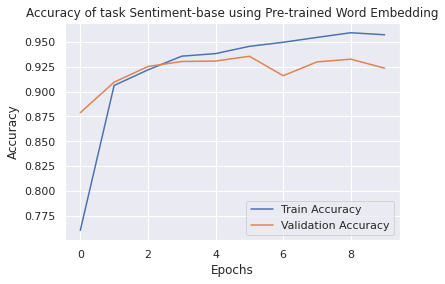

In [51]:
plt.figure(0)
plt.plot(history_Neural_PTWE.history['binary_accuracy'], label = 'Train Accuracy')
plt.plot(history_Neural_PTWE.history['val_binary_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy of task Sentiment-base using Pre-trained Embedding')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

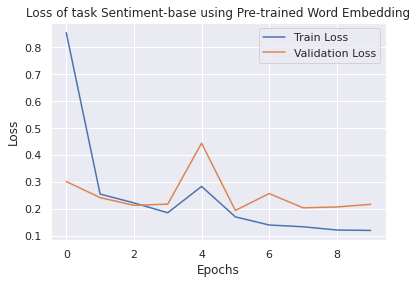

In [52]:
plt.figure(0)
plt.plot(history_Neural_PTWE.history['loss'], label = 'Train Loss')
plt.plot(history_Neural_PTWE.history['val_loss'], label = 'Validation Loss')
plt.title('Loss of task Sentiment-base using Pre-trained Embedding')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Predict

In [53]:
y_pred_test = model_Neural_PTWE.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

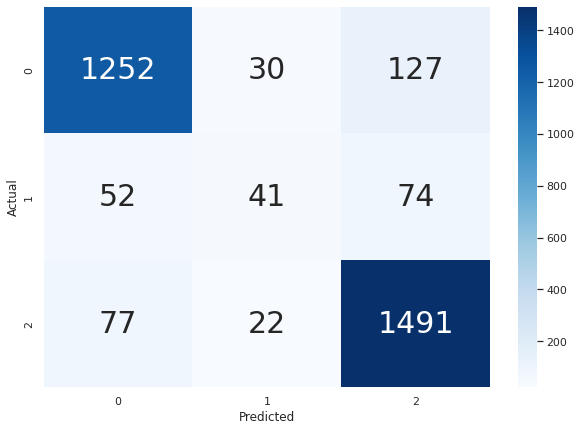

In [54]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test, y_pred_test) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
print('F1-score macro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='macro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test, y_pred_test, average='micro')*100, 2)))

F1-score macro test set: 70.72%
F1-score micro test set: 87.93%


## Tác vụ **topic-based**

### Thuật toán máy học cơ bản

#### Naive Bayes

##### Import các thư viện cần thiết

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sn 

sn.set()

##### Tiền xử lý dữ liệu

In [57]:
cv = CountVectorizer(analyzer='word', ngram_range=(2,2))
cv.fit(X_train)

# Mã hóa văn bản tập train
X_train_encoded = cv.transform(X_train)
# Mã hóa văn bản tập dev
X_dev_encoded = cv.transform(X_dev)
# Mã hóa văn bản tập test
X_test_encoded = cv.transform(X_test)

##### Training model

In [58]:
model_NB_topic = MultinomialNB()
model_NB_topic.fit(X_train_encoded, y_train_topic)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##### Predict

In [59]:
y_pred_dev_topic = model_NB_topic.predict(X_dev_encoded)
y_pred_test_topic = model_NB_topic.predict(X_test_encoded)

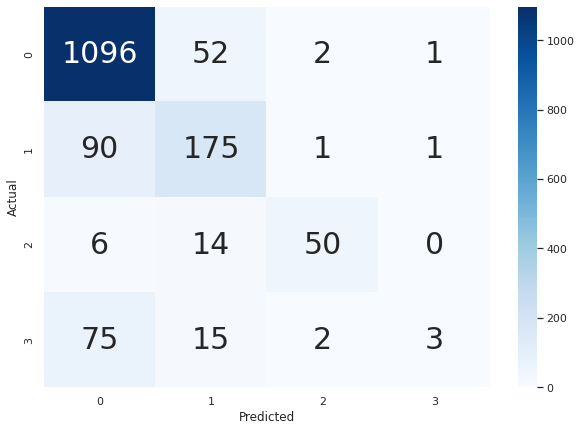

In [60]:
# Visualization confusion matrix of dev set
cm = confusion_matrix(y_dev_topic, y_pred_dev_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

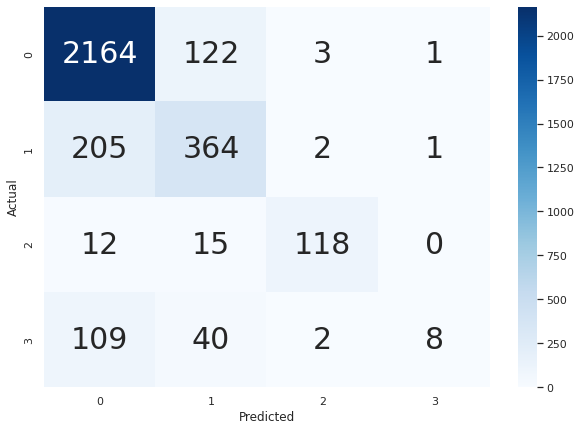

In [61]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test_topic, y_pred_test_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
print('F1-score macro dev set: {}%'.format(round(f1_score(y_dev_topic, y_pred_dev_topic, average='macro')*100, 2)))
print('F1-score macro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='macro')*100, 2)))

print('F1-score micro dev set: {}%'.format(round(f1_score(y_dev_topic, y_pred_dev_topic, average='micro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='micro')*100, 2)))

F1-score macro dev set: 60.89%
F1-score macro test set: 63.21%
F1-score micro dev set: 83.64%
F1-score micro test set: 83.83%


#### Logistic Regression

##### Import các thư viện cần thiết

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sn 

sn.set()

##### Tiền xử lý dữ liệu

In [64]:
cv = CountVectorizer(analyzer='word', ngram_range=(2,2))
cv.fit(X_train)

# Mã hóa văn bản tập train
X_train_encoded = cv.transform(X_train)
# Mã hóa văn bản tập dev
X_dev_encoded = cv.transform(X_dev)
# Mã hóa văn bản tập test
X_test_encoded = cv.transform(X_test)

##### Training model

In [65]:
model_LR_topic = LogisticRegression()
model_LR_topic.fit(X_train_encoded, y_train_topic)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predict

In [66]:
y_pred_dev_topic = model_LR_topic.predict(X_dev_encoded)
y_pred_test_topic = model_LR_topic.predict(X_test_encoded)

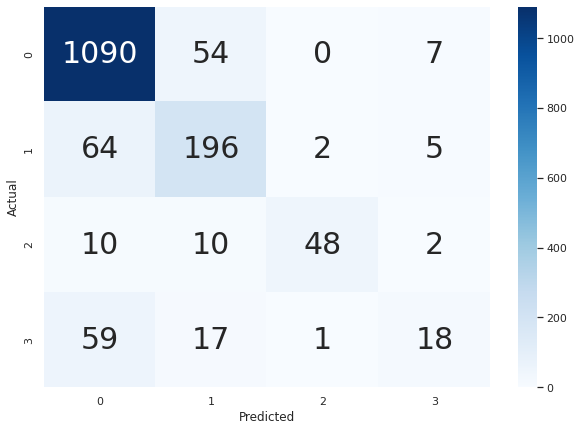

In [67]:
# Visualization confusion matrix of dev set
cm = confusion_matrix(y_dev_topic, y_pred_dev_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

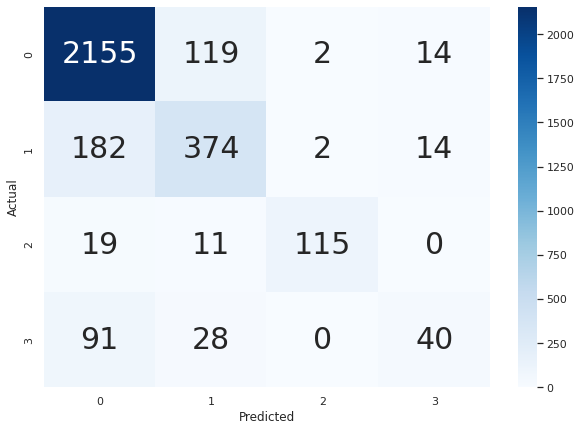

In [68]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test_topic, y_pred_test_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
print('F1-score macro dev set: {}%'.format(round(f1_score(y_dev_topic, y_pred_dev_topic, average='macro')*100, 2)))
print('F1-score macro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='macro')*100, 2)))

print('F1-score micro dev set: {}%'.format(round(f1_score(y_dev_topic, y_pred_dev_topic, average='micro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='micro')*100, 2)))

F1-score macro dev set: 67.89%
F1-score macro test set: 70.28%
F1-score micro dev set: 85.41%
F1-score micro test set: 84.78%


#### Support Vector Machine

##### Import các thư viện cần thiết

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sn 

sn.set()

##### Tiền xử lý dữ liệu

In [71]:
cv = CountVectorizer(analyzer='word', ngram_range=(2,2))
cv.fit(X_train)

# Mã hóa văn bản tập train
X_train_encoded = cv.transform(X_train)
# Mã hóa văn bản tập dev
X_dev_encoded = cv.transform(X_dev)
# Mã hóa văn bản tập test
X_test_encoded = cv.transform(X_test)

##### Training model

In [72]:
model_SVM_topic = SVC()
model_SVM_topic.fit(X_train_encoded, y_train_topic)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Predict

In [73]:
y_pred_dev_topic = model_SVM_topic.predict(X_dev_encoded)
y_pred_test_topic = model_SVM_topic.predict(X_test_encoded)

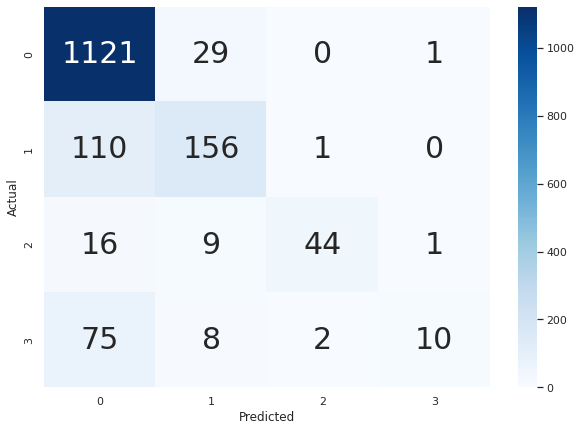

In [74]:
# Visualization confusion matrix of dev set
cm = confusion_matrix(y_dev_topic, y_pred_dev_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

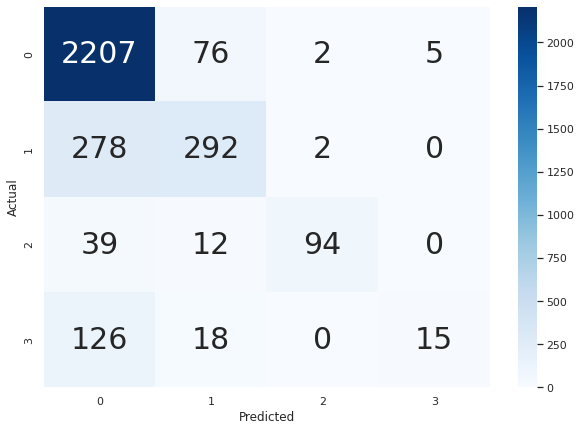

In [75]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test_topic, y_pred_test_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
print('F1-score macro dev set: {}%'.format(round(f1_score(y_dev_topic, y_pred_dev_topic, average='macro')*100, 2)))
print('F1-score macro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='macro')*100, 2)))

print('F1-score micro dev set: {}%'.format(round(f1_score(y_dev_topic, y_pred_dev_topic, average='micro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='micro')*100, 2)))

F1-score macro dev set: 62.77%
F1-score macro test set: 60.92%
F1-score micro dev set: 84.08%
F1-score micro test set: 82.38%


### Mạng neural, sử dụng **word embedding**

In [77]:
! pip install gensim
! pip install pyvi

#### Import các thư viện cần thiết

In [78]:
from pyvi import ViTokenizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer 
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, confusion_matrix

import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

sn.set()

#### Tiền xử lý dữ liệu

##### **Cách 1**: Tự xây dựng bộ từ vựng và từ điển tương ứng

###### Xây dựng tập từ vựng

In [79]:
# make vocabulary
V = [] 
for t in X_train: 
    tokenized_sentence = ViTokenizer.tokenize(t) 
    V = V + tokenized_sentence.split() 
 
V = list(set(V))

###### Xây dựng word_to_index và index_to_word

In [80]:
# Building dictionary  
word_to_index = {w : (i+2) for i, w in enumerate(V)} 
 
word_to_index['UNK'] = 1 
word_to_index['PAD'] = 0 
 
# Build index2w 
index_to_word = {i: w for w, i in word_to_index.items()}

###### Tiến hành encode dữ liệu văn bản

In [81]:
max_len = 100

def encoding(X): 
  sentences = [] 
  for t in X: 
    tokenized_sentence = ViTokenizer.tokenize(t) 
    sentences.append(tokenized_sentence) 
     
  X = [] 
  for s in sentences: 
    sent = [] 
    for w in s.split(): 
      try: 
        w = w.lower() 
        sent.append(dictionary[w]) 
      except: 
        sent.append(dictionary["UNK"]) 
    X.append(sent) 
     
  # Padding du lieu theo do dai cau (maxlen) 
  X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = dictionary["PAD"]) 
 
  return X 

##### **Cách 2**: Dùng thư viện có sẵn trong keras. Sử dụng thư viện **Tokenizer**

In [82]:
max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train)

word_2_index = word_tokenizer.word_index
word_2_index['pad'] = 0
word_2_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
  sentences = []
  for t in X:
    tokenized_sentence = ViTokenizer.tokenize(t)
    sentences.append(tokenized_sentence)
    
  X = word_tokenizer.texts_to_sequences(sentences)
  X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_2_index['pad'])

  return X

###### Tiến hành encode dữ liệu

In [83]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

#### Training model

In [84]:
num_words = len(word_2_index)
input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words+1, output_dim=300, input_length=max_len)(input)
flat = Flatten()(emb)
output = Dense(4, activation='sigmoid')(flat)

model_Neural_WE_topic = Model(input, output)
# Compile model
model_Neural_WE_topic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [85]:
model_Neural_WE_topic.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 300)          747600    
_________________________________________________________________
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 120004    
Total params: 867,604
Trainable params: 867,604
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Training model
history_Neural_WE_topic = model_Neural_WE_topic.fit(X_train_encoded, to_categorical(y_train_topic, num_classes=4),
                                                    validation_data=(X_dev_encoded, to_categorical(y_dev_topic, num_classes=4)), 
                                                    batch_size=128, epochs=10)

Epoch 1/10
90/90 [==============================] - 4s 37ms/step - loss: 0.2936 - binary_accuracy: 0.8786 - val_loss: 0.2018 - val_binary_accuracy: 0.9131
Epoch 2/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1703 - binary_accuracy: 0.9324 - val_loss: 0.1618 - val_binary_accuracy: 0.9315
Epoch 3/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1341 - binary_accuracy: 0.9487 - val_loss: 0.1541 - val_binary_accuracy: 0.9341
Epoch 4/10
90/90 [==============================] - 3s 33ms/step - loss: 0.1143 - binary_accuracy: 0.9587 - val_loss: 0.1545 - val_binary_accuracy: 0.9345
Epoch 5/10
90/90 [==============================] - 3s 34ms/step - loss: 0.0984 - binary_accuracy: 0.9654 - val_loss: 0.1566 - val_binary_accuracy: 0.9343
Epoch 6/10
90/90 [==============================] - 3s 34ms/step - loss: 0.0844 - binary_accuracy: 0.9720 - val_loss: 0.1645 - val_binary_accuracy: 0.9346
Epoch 7/10
90/90 [==============================] - 3s 35ms/step - los

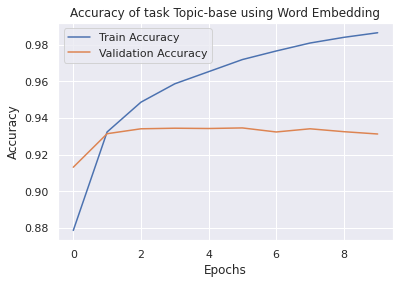

In [87]:
plt.figure(0)
plt.plot(history_Neural_WE_topic.history['binary_accuracy'], label = 'Train Accuracy')
plt.plot(history_Neural_WE_topic.history['val_binary_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy of task Topic-base using Word Embedding')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

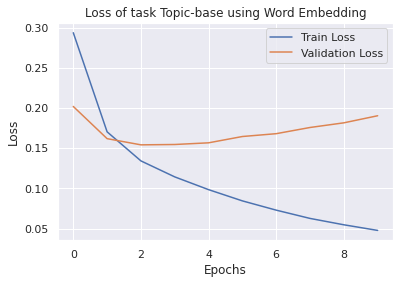

In [88]:
plt.figure(0)
plt.plot(history_Neural_WE_topic.history['loss'], label = 'Train Loss')
plt.plot(history_Neural_WE_topic.history['val_loss'], label = 'Validation Loss')
plt.title('Loss of task Topic-base using Word Embedding')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Predict

In [89]:
y_pred_test_topic = model_Neural_WE_topic.predict(X_test_encoded)
y_pred_test_topic = np.argmax(y_pred_test_topic, axis=-1)

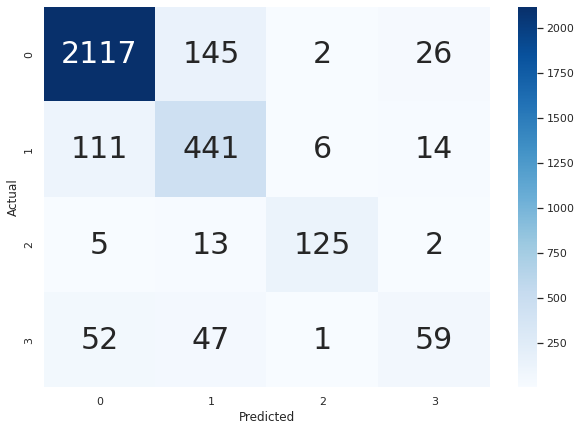

In [90]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test_topic, y_pred_test_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
print('F1-score macro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='macro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='micro')*100, 2)))

F1-score macro test set: 74.99%
F1-score micro test set: 86.61%


### Mạng neural, sử dụng **pre-trained embedding**

In [92]:
! pip install pyvi

#### Import các thư viện cần thiết

In [93]:
from pyvi import ViTokenizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer 
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, confusion_matrix

import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

sn.set()

#### Tiền xử lý dữ liệu

##### Đọc dữ liệu từ bộ word embedding

In [94]:
# Read embedding
word_dict = []
embeddings_index = {}
embedding_dim = 300
max_feature = len(embeddings_index) + 2

f = open(path + '/W2V_ner.vec')
for line in f:
  values = line.split(' ')
  word = values[0] 
  word_dict.append(word)
  try:
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  except Exception as e:
    pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [95]:
max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train.values)
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
  sentences = []  
  for t in X:
    tokenized_sentence = ViTokenizer.tokenize(t)
    sentences.append(tokenized_sentence)
    
  X = word_tokenizer.texts_to_sequences(sentences)
  X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index['pad'])

  return X

##### Xây dựng embedding matrix cho pre-trained embedding

In [96]:
# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
  if i > max_feature:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
  else:
    # doesn't exist, assign a random vector
    embedding_matrix[i] = np.random.randn(embedding_dim)

###### Tiến hành encode dữ liệu

In [97]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

#### Training model

In [98]:
num_words = len(word_to_index)

input = Input(shape = (max_len, ))
emb = Embedding(input_dim=num_words,
                output_dim=embedding_dim,
                embeddings_initializer=Constant(embedding_matrix),
                input_length=max_len,
                trainable=True)(input)
flat = Flatten()(emb)
output = Dense(4, activation="sigmoid")(flat)

model_Neural_PTWE_topic = Model(input, output)
# Compile model
model_Neural_PTWE_topic.compile(optimizer="adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

In [99]:
model_Neural_PTWE_topic.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 300)          747300    
_________________________________________________________________
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 120004    
Total params: 867,304
Trainable params: 867,304
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Training model
history_Neural_PTWE_topic = model_Neural_PTWE_topic.fit(X_train_encoded, to_categorical(y_train_topic, num_classes=4), 
                                                        validation_data=(X_dev_encoded, to_categorical(y_dev_topic, num_classes=4)), 
                                                        batch_size=128, epochs=10)

Epoch 1/10
90/90 [==============================] - 4s 36ms/step - loss: 1.0113 - binary_accuracy: 0.8303 - val_loss: 0.2456 - val_binary_accuracy: 0.8943
Epoch 2/10
90/90 [==============================] - 3s 34ms/step - loss: 0.2309 - binary_accuracy: 0.9088 - val_loss: 0.2186 - val_binary_accuracy: 0.9106
Epoch 3/10
90/90 [==============================] - 3s 35ms/step - loss: 0.1890 - binary_accuracy: 0.9250 - val_loss: 0.2729 - val_binary_accuracy: 0.8888
Epoch 4/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1649 - binary_accuracy: 0.9355 - val_loss: 0.1961 - val_binary_accuracy: 0.9240
Epoch 5/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1408 - binary_accuracy: 0.9448 - val_loss: 0.2045 - val_binary_accuracy: 0.9294
Epoch 6/10
90/90 [==============================] - 3s 34ms/step - loss: 0.1665 - binary_accuracy: 0.9437 - val_loss: 0.1801 - val_binary_accuracy: 0.9285
Epoch 7/10
90/90 [==============================] - 3s 34ms/step - los

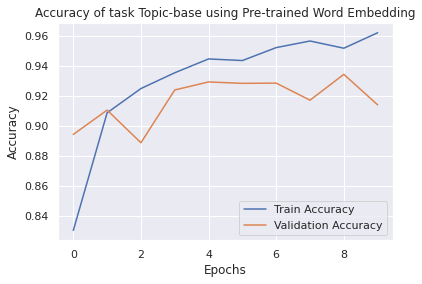

In [101]:
plt.figure(0)
plt.plot(history_Neural_PTWE_topic.history['binary_accuracy'], label = 'Train Accuracy')
plt.plot(history_Neural_PTWE_topic.history['val_binary_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy of task Topic-base using Pre-trained Embedding')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

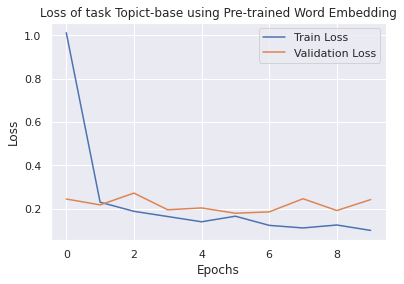

In [102]:
plt.figure(0)
plt.plot(history_Neural_PTWE_topic.history['loss'], label = 'Train Loss')
plt.plot(history_Neural_PTWE_topic.history['val_loss'], label = 'Validation Loss')
plt.title('Loss of task Topict-base using Pre-trained Embedding')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Predict

In [103]:
y_pred_test_topic = model_Neural_PTWE_topic.predict(X_test_encoded)
y_pred_test_topic = np.argmax(y_pred_test_topic, axis=-1)

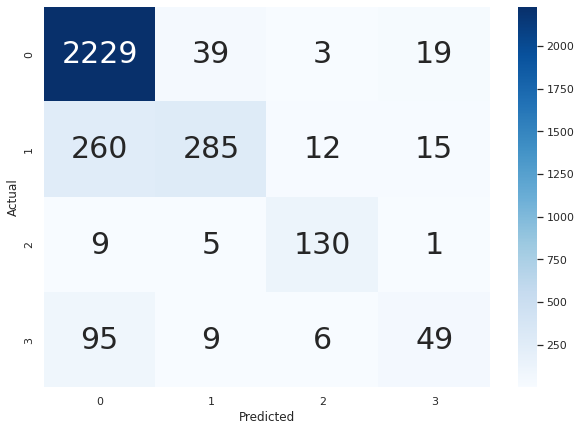

In [104]:
# Visualization confusion matrix of test set
cm = confusion_matrix(y_test_topic, y_pred_test_topic) 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap = 'Blues', fmt='g', cbar=True, annot_kws={"size": 30})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [105]:
print('F1-score macro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='macro')*100, 2)))
print('F1-score micro test set: {}%'.format(round(f1_score(y_test_topic, y_pred_test_topic, average='micro')*100, 2)))

F1-score macro test set: 70.53%
F1-score micro test set: 85.06%
